In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
#file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
#show the first five rows
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#Explore the dataset

In [ ]:
#number of rows and columns
df.shape

(65457, 114)

In [ ]:
#datatype
df.dtypes

,0
ResponseId,int64
MainBranch,object
Age,object
Employment,object
RemoteWork,object
...,...
JobSatPoints_11,float64
SurveyLength,object
SurveyEase,object
ConvertedCompYearly,float64


In [3]:
#mean age of the survey participants

# Mapping age ranges to their approximate midpoints
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70
}

# Convert age categories to numerical values
df["Age_numeric"] = df["Age"].map(age_mapping)

# Compute the mean age
mean_age = np.nanmean(df["Age_numeric"])
mean_age

33.007870690317134

In [ ]:
#unique Country
df['Country'].unique()

## Some of the trends you I will explore include:

- Which programming languages are most in demand?
- Which database technologies are currently most sought after?
- Which Integrated Development Environments (IDEs) are the most popular?

In [152]:
selected_columns=['ResponseId',	'MainBranch',	'Age',	'Employment',	'RemoteWork','CodingActivities','EdLevel','LearnCode','LearnCodeOnline','YearsCode',
                  'YearsCodePro',	'DevType', 'Country', 'ConvertedCompYearly','LanguageHaveWorkedWith','LanguageWantToWorkWith',
                  'DatabaseHaveWorkedWith','DatabaseWantToWorkWith','PlatformHaveWorkedWith','PlatformWantToWorkWith','JobSat','JobSatPoints_1',
                  'WebframeHaveWorkedWith', 'WebframeWantToWorkWith']
new_df=df[selected_columns]

In [ ]:
new_df.shape

(65437, 25)

#Identify and Analyze Duplicates

In [ ]:
duplicates = new_df.duplicated()

# count the duplicates
num_duplicates = duplicates.sum()
print(f"Numero di righe duplicate: {num_duplicates}")

Numero di righe duplicate: 0


In [ ]:
# Display the first few duplicate rows
duplicate_rows = df[duplicates]
print("First few duplicate rows:")
print(duplicate_rows.head())

In [ ]:
# Identify duplicate rows based on selected columns
selected_columns = ["MainBranch", "Employment", "RemoteWork"]
duplicate_rows_subset = df[df.duplicated(subset=selected_columns, keep=False)]

# Count the number of duplicate rows based on selected columns
num_duplicates_subset = duplicate_rows_subset.shape[0]

# Analyze which columns frequently contain identical values within these duplicate rows
identical_value_counts = (duplicate_rows_subset.nunique() == 1).sum()

# Display results
num_duplicates_subset, identical_value_counts, duplicate_rows_subset.head()

Number of duplicate rows based on MainBranch, Employment, and RemoteWork: 65,270. These rows contain at least one other identical entry based on the selected columns.

One column frequently contains identical values within these duplicate rows.
This suggests that a specific column tends to have the same value across most duplicate rows.

The first few duplicate rows show that MainBranch, Employment, and RemoteWork often repeat. Other columns, such as Age, Check, and CodingActivities, may vary within duplicates.

##Visualize Duplicates Distribution

In [ ]:
# Count duplicates by Country and Employment
duplicates_by_country = duplicate_rows_subset["Country"].value_counts().head(10)  # Top 10 countries
duplicates_by_employment = duplicate_rows_subset["Employment"].value_counts()

In [ ]:
duplicates_by_country = duplicates_by_country.rename(index={"United Kingdom of Great Britain and Northern Ireland": "UK", "United States of America":"USA"})

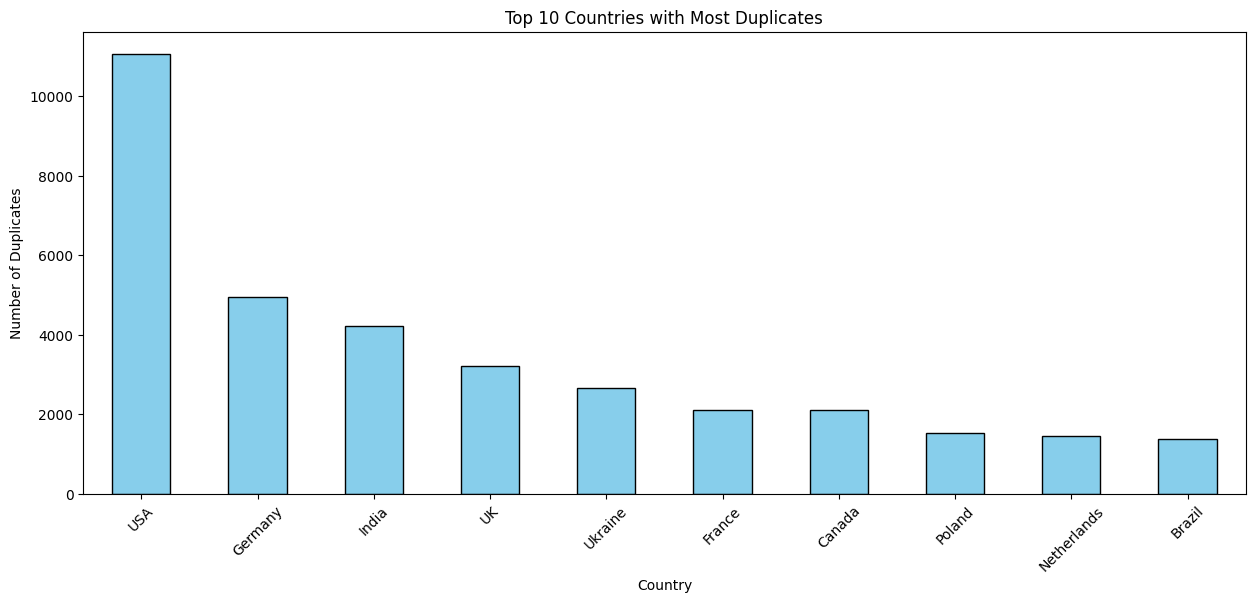

In [ ]:
plt.figure(figsize=(15, 6))
# Bar chart for duplicates by Country
duplicates_by_country.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Countries with Most Duplicates")
plt.xlabel("Country")
plt.ylabel("Number of Duplicates")
plt.xticks(rotation=45)
plt.show()

Modify the duplicates_by_employment dataframe

In [ ]:
duplicates_by_employment=duplicates_by_employment.reset_index()

In [ ]:
# values that can't be converted
non_numerici = duplicates_by_employment[~duplicates_by_employment['count'].apply(pd.to_numeric, errors='coerce').notna()]
print(non_numerici)

In [ ]:
# Converting the 'count' column to numeric, non-numeric values will become NaN
duplicates_by_employment['count'] = pd.to_numeric(duplicates_by_employment['count'], errors='coerce')
other_employment=duplicates_by_employment[duplicates_by_employment['count']<3000]['count'].sum()

In [ ]:
duplicates_by_employment_pie=duplicates_by_employment[duplicates_by_employment['count']>=3000]
# Concatenate the new row to the DataFrame
new_row=pd.DataFrame({'Employment':['Other'],'count':[other_employment]})
duplicates_by_employment_pie = pd.concat([duplicates_by_employment_pie, new_row], ignore_index=True)
duplicates_by_employment_pie = duplicates_by_employment_pie.set_index('Employment')

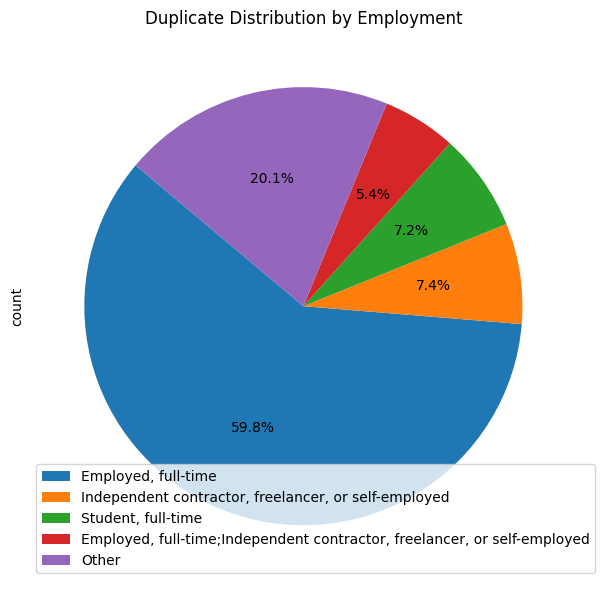

In [ ]:
# Pie chart for duplicates by Employment
plt.figure(figsize=(15, 6))
duplicates_by_employment_pie['count'].plot(kind="pie", autopct='%1.1f%%', startangle=140, labels=None, legend=True)
plt.title("Duplicate Distribution by Employment")

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
df = df.drop_duplicates()

#Handling missing values

In [153]:
#determine the number of missing values
missing_values=new_df.isna().sum()
missing_values.sort_values(ascending=False).iloc[0:30]

,0
ConvertedCompYearly,42002
JobSat,36311
JobSatPoints_1,36113
PlatformWantToWorkWith,30905
WebframeWantToWorkWith,26902
PlatformHaveWorkedWith,23071
DatabaseWantToWorkWith,22879
WebframeHaveWorkedWith,20276
LearnCodeOnline,16200
DatabaseHaveWorkedWith,15183


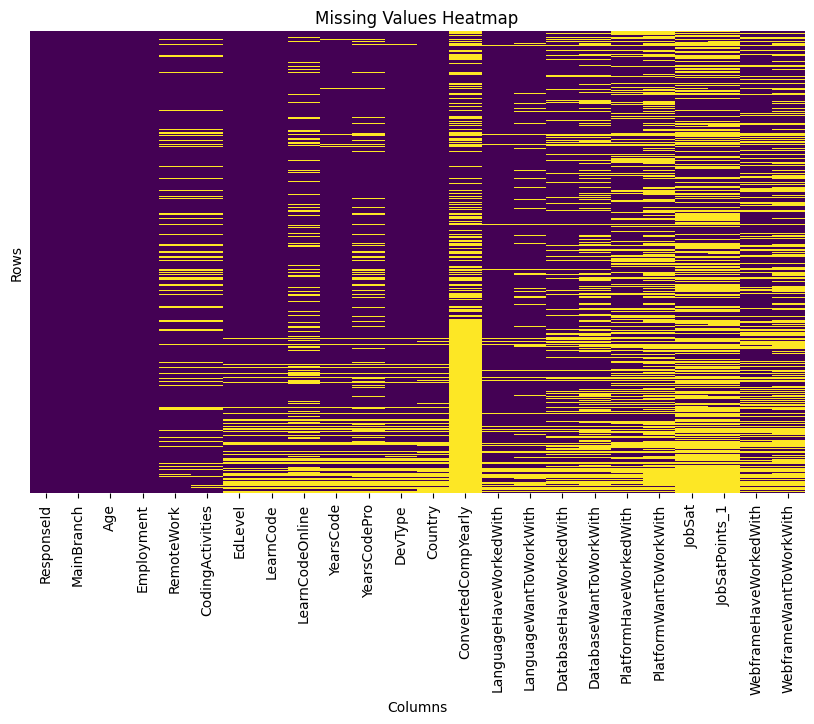

In [154]:
# Create a heatmap for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(new_df.isna(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=True)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

##EdLevel col - Replace missing values with a proportional distribution

In [155]:
# Proportional distribution (without Nan)
df_no_nan = new_df.dropna(subset=['EdLevel'])
probabilities = df_no_nan['EdLevel'].value_counts(normalize=True)  # Probability for each cathegory

new_df.loc[new_df['EdLevel'].isna(), 'EdLevel'] = np.random.choice(probabilities.index, size=new_df['EdLevel'].isna().sum(), p=probabilities.values)

print('missing values EdLevel col: ', new_df['EdLevel'].isna().sum())
new_df['EdLevel'].value_counts().reset_index()

missing values EdLevel col:  0


,EdLevel,count
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",26875
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",16718
2,Some college/university study without earning ...,8199
3,"Secondary school (e.g. American high school, G...",6278
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",3217
5,"Associate degree (A.A., A.S., etc.)",1927
6,Primary/elementary school,1226
7,Something else,997


## YearsCode col - Replace missing values with median value

In [61]:
print('missing values YearsCode col: ', new_df['YearsCode'].isna().sum())

missing values YearsCode col:  5568


In [ ]:
# Convert YearsCode to string (to avoid issues)
new_df.loc[:, 'YearsCode'] = new_df['YearsCode'].astype(str)

# Replace non-numeric values
new_df.loc[:,'YearsCode'] = new_df['YearsCode'].replace({
    'Less than 1 year': 0.5,  # Approximate value
    'More than 50 years': 51  # Approximate value
})

# Convert to numeric
new_df.loc[:,'YearsCode'] = pd.to_numeric(new_df['YearsCode'], errors='coerce')

median_value = new_df['YearsCode'].median()
new_df.loc[:,'YearsCode']=new_df['YearsCode'].fillna(median_value)

## RemoteWork col - Replace missing values with a proportional distribution

In [158]:
print('missing values RemoteWork col: ', new_df['RemoteWork'].isna().sum())

missing values RemoteWork col:  0


In [159]:
# Proportional distribution (without Nan)
df_no_nan = new_df.dropna(subset=['RemoteWork'])
probabilities = df_no_nan['RemoteWork'].value_counts(normalize=True)  # Probability for each cathegory

new_df.loc[new_df['RemoteWork'].isna(), 'RemoteWork'] = np.random.choice(probabilities.index, size=new_df['RemoteWork'].isna().sum(), p=probabilities.values)
new_df['RemoteWork'].value_counts().reset_index()

,RemoteWork,count
0,"Hybrid (some remote, some in-person)",27522
1,Remote,24836
2,In-person,13079


## CodingActivities col - fill the missing values with "Not specified"

In [65]:
print('missing values CodingActivities col: ', new_df['CodingActivities'].isna().sum())

missing values CodingActivities col:  10971


In [160]:
# df_activities each CodingActivities (cols) is 1 (present) 0 (not present) created before the nan handling
df_activities = new_df['CodingActivities'].str.get_dummies(sep=';')

In [ ]:
new_df['CodingActivities']=new_df['CodingActivities'].fillna('Not specified')

## ConvertedCompYearly col - fill missing values with mean value

In [68]:
new_df['ConvertedCompYearly'].isna().sum()

42002

In [69]:
new_df['ConvertedCompYearly'].describe()

,ConvertedCompYearly
count,2.343500e+04
mean,8.615529e+04
std,1.867570e+05
min,1.000000e+00
25%,3.271200e+04
50%,6.500000e+04
75%,1.079715e+05
max,1.625660e+07


In [162]:
mean_comp = new_df['ConvertedCompYearly'].mean()
new_df.loc[:,'ConvertedCompYearly']=new_df['ConvertedCompYearly'].fillna(mean_comp)

## YearsCodePro col - fill missing values with median value

In [71]:
missing_ycp=new_df['YearsCodePro'].isna().sum()
print('missing values YearsCodePro col: ', missing_ycp,' (', round((100*missing_ycp)/new_df.shape[0],2), '% )')

missing values YearsCodePro col:  13827  ( 21.13 % )


In [ ]:
# Convert "Less than 1 year" → 0, "More than 50 years" → 51
new_df['YearsCodePro'] = new_df['YearsCodePro'].replace({
    "Less than 1 year": 0,
    "More than 50 years": 51
}).astype(float)  # Convert to numeric

# Fill missing values with median
median_value = new_df['YearsCodePro'].median()
new_df['YearsCodePro'].fillna(median_value, inplace=True)

# Define Experience Levels
def categorize_experience(years):
    if years <= 2:
        return 'Beginner'
    elif 3 <= years <= 5:
        return 'Junior'
    elif 6 <= years <= 10:
        return 'Mid-Level'
    elif 11 <= years <= 20:
        return 'Senior'
    else:
        return 'Expert'

# Apply categorization
new_df['ExperienceLevel'] = new_df['YearsCodePro'].apply(categorize_experience)

## Country col - anomalies correction

In [ ]:
# Standardize country names
country_corrections = {
    "Republic of Korea": "South Korea",
    "Democratic People's Republic of Korea": "North Korea",
    "Venezuela, Bolivarian Republic of...": "Venezuela",
    "Iran, Islamic Republic of...": "Iran",
    "Congo, Republic of the...": "Republic of the Congo",
    "Hong Kong (S.A.R.)": "Hong Kong",
    "Viet Nam": "Vietnam",
    "Swaziland": "Eswatini",  # New official name
    "United Republic of Tanzania": "Tanzania",
    "Lao People's Democratic Republic": "Laos",
    "Syrian Arab Republic": "Syria",
    "Russian Federation": "Russia",
    "Côte d'Ivoire": "Ivory Coast",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Federated States of Micronesia": "Micronesia",
    "North Macedonia": "Macedonia",
    "Eswatini": "Swaziland",  # If you prefer the old name
}

# Apply corrections
new_df['Country'] = new_df['Country'].replace(country_corrections)

# Handle missing values
new_df['Country'].fillna("Unknown", inplace=True)

## JobSat col

In [74]:
missing_jobsat = new_df['JobSat'].isna().sum()
print('Missing values on JobSat col: ', missing_jobsat,' (', round((100*missing_jobsat)/new_df.shape[0],2), '% )')

Missing values on JobSat col:  36311  ( 55.49 % )


In [75]:
new_df['JobSat'].describe()

,JobSat
count,29126.000000
mean,6.935041
std,2.088259
min,0.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.000000


In [165]:
# missing values
missing_values_by_experience = new_df.groupby('ExperienceLevel')['JobSat'].apply(lambda x: x.isna().sum()).reset_index()
missing_values_by_experience.columns = ['ExperienceLevel', 'MissingJobSatCount']
print(missing_values_by_experience)

  ExperienceLevel  MissingJobSatCount
0        Beginner                5557
1          Expert                3364
2          Junior                4691
3       Mid-Level               17973
4          Senior                4726


In [ ]:
median_job_sat_by_experience = new_df.groupby('ExperienceLevel')['JobSat'].median()

# replace missing values 'JobSat' col with median of 'ExperienceLevel' cathegory
new_df['JobSat'] = new_df.apply(
    lambda row: median_job_sat_by_experience[row['ExperienceLevel']] if pd.isna(row['JobSat']) else row['JobSat'],
    axis=1
)

#EDA

## Analysis of Experience and Job Satisfaction

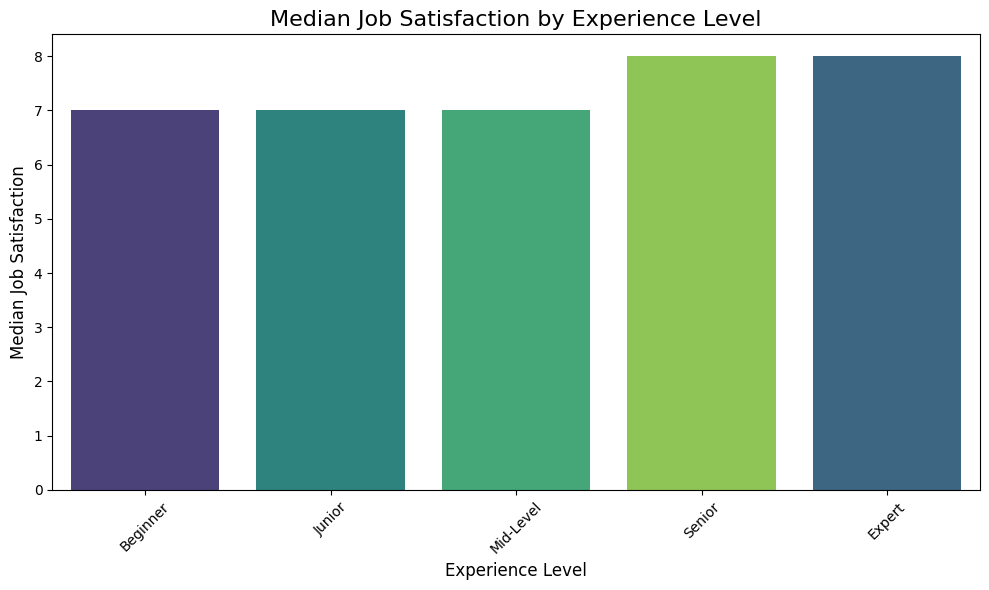

In [78]:
# First, calculate the median of JobSat for each ExperienceLevel
median_job_sat_by_experience = new_df.groupby('ExperienceLevel')['JobSat'].median().reset_index()

experience_order = ['Beginner', 'Junior', 'Mid-Level', 'Senior', 'Expert']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='ExperienceLevel', y='JobSat', data=median_job_sat_by_experience, palette='viridis',
            hue='ExperienceLevel', legend=False, order=experience_order)

# Set plot titles and labels
plt.title('Median Job Satisfaction by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Median Job Satisfaction', fontsize=12)

# Show plot
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()  # To make sure everything fits
plt.show()


##Visualize Job Satisfaction

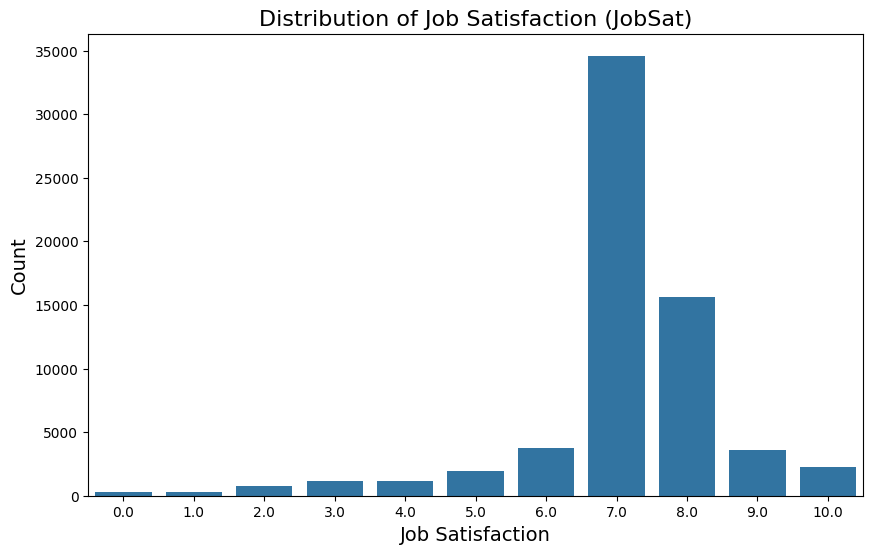

In [79]:
# Create a count plot to visualize the distribution of JobSat values
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='JobSat')

# Add labels and title
plt.title('Distribution of Job Satisfaction (JobSat)', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()

## Analyzing Remote Work Preferences by Job Role ('Employment' col)

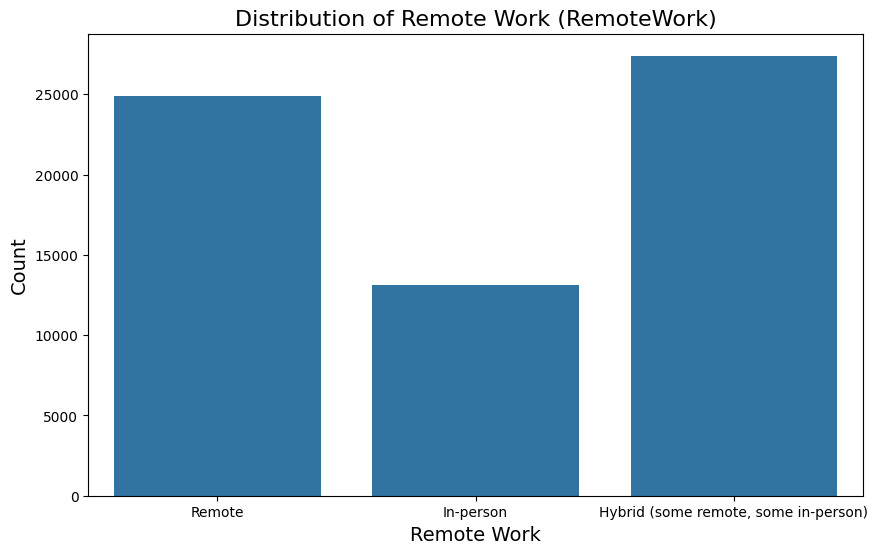

In [26]:
# Create a count plot to visualize the distribution of JobSat values
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='RemoteWork')

# Add labels and title
plt.title('Distribution of Remote Work (RemoteWork)', fontsize=16)
plt.xlabel('Remote Work', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()

In [80]:
Employment = new_df['Employment'].str.get_dummies(sep=';')
Employment_remote=pd.concat([Employment, new_df['RemoteWork']], axis=1)

In [81]:
# Cross-tabulation of RemoteWork by Employment Type
employment_types = [
    "Employed, full-time",
    "Employed, part-time",
    "I prefer not to say",
    "Independent contractor, freelancer, or self-employed",
    "Not employed, and not looking for work",
    "Not employed, but looking for work",
    "Retired",
    "Student, full-time",
    "Student, part-time"
]

# Creating a crosstab
#The table will show the count of respondents who prefer Remote, In-person, or Hybrid, grouped by employment type
remote_work_crosstab = pd.crosstab(index=Employment_remote['RemoteWork'],
                                    columns=Employment_remote[employment_types].idxmax(axis=1))

# Display the result
print(remote_work_crosstab)

col_0                                 Employed, full-time  \
RemoteWork                                                  
Hybrid (some remote, some in-person)                19698   
In-person                                            9608   
Remote                                              15856   

col_0                                 Employed, part-time  \
RemoteWork                                                  
Hybrid (some remote, some in-person)                 1701   
In-person                                             942   
Remote                                                996   

col_0                                 I prefer not to say  \
RemoteWork                                                  
Hybrid (some remote, some in-person)                  239   
In-person                                             120   
Remote                                                187   

col_0                                 Independent contractor, freelancer, or self-

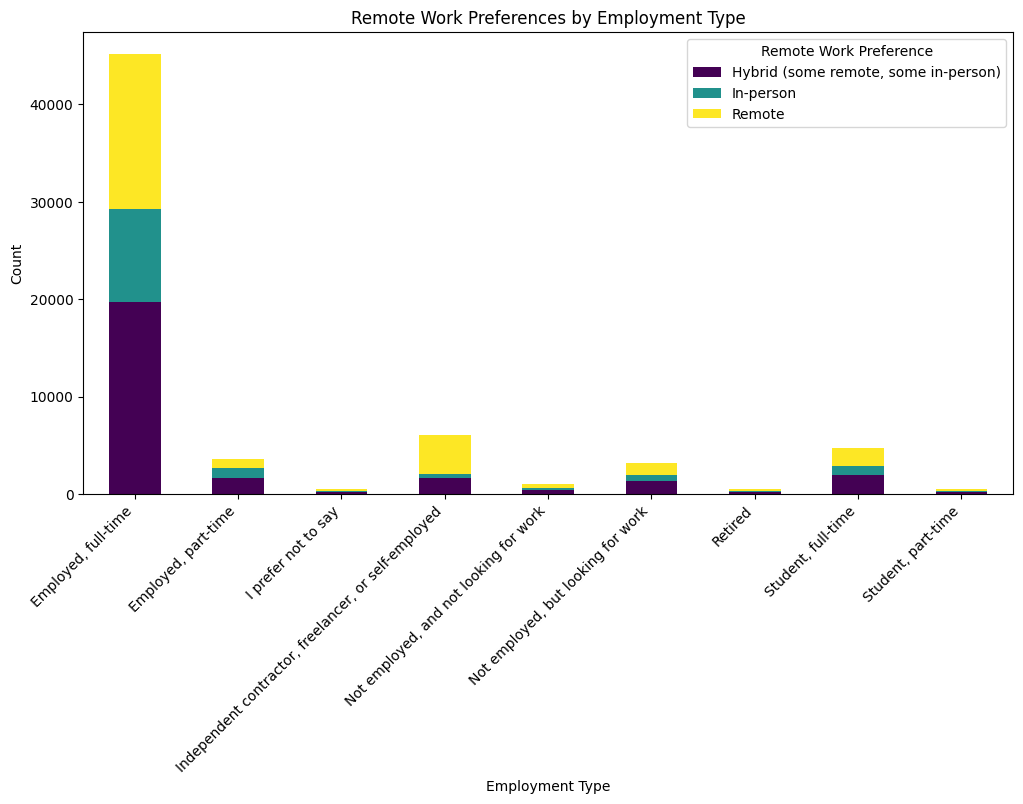

In [36]:
# Transpose the crosstab for plotting
remote_work_crosstab.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title("Remote Work Preferences by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.legend(title="Remote Work Preference")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()


## Analyzing Programming Language Trends by Region

In [ ]:
LanguageHaveWorkedWith = new_df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
LanguageHaveWorkedWith_region=pd.concat([LanguageHaveWorkedWith, new_df['Country']], axis=1)
LanguageHaveWorkedWith_region

In [83]:
# Group by 'Country' and sum all programming language columns
language_region_df = LanguageHaveWorkedWith_region.groupby('Country').sum()

# Transpose for better readability (optional)
language_region_df = language_region_df.T

language_region_df.head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libyan Arab Jamahiriya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,"Micronesia, Federated States of...",Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,Nomadic,North Korea,Norway,Oman,Pakistan,Palestine,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Moldova,Republic of North Macedonia,Republic of the Congo,Romania,Russia,Rwanda,Saint Kitts and Nevis,Samoa,San Marino,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States of America,Unknown,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Ada,9,5,3,1,3,1,2,1,6,6,1,0,0,3,1,0,2,0,1,0,0,0,0,9,1,0,0,0,1,0,11,0,0,0,0,1,1,1,1,1,0,3,0,5,0,0,0,0,2,0,0,0,0,2,0,2,41,1,0,26,0,0,0,0,0,0,0,0,1,1,0,32,4,4,0,2,0,0,6,0,0,2,3,0,4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,10,1,0,0,1,1,0,1,0,0,2,2,1,1,1,14,2,2,8,0,8,0,0,0,0,2,2,7,1,0,0,0,0,1,6,2,0,0,0,6,0,3,0,1,0,0,1,0,3,2,17,2,0,0,10,6,0,0,0,1,6,0,0,0,5,0,0,27,1,11,83,58,2,0,1,0,1,0,1
Apex,4,0,1,0,1,0,4,0,9,6,0,0,0,2,0,0,3,0,0,0,0,0,0,16,0,1,0,0,0,1,18,0,0,0,1,1,1,2,4,1,0,2,0,0,0,0,1,0,1,0,0,1,0,0,0,1,6,1,0,25,0,3,0,0,0,0,0,1,1,2,1,27,4,4,0,3,0,1,9,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,4,0,0,13,0,0,0,0,0,0,0,0,0,0,9,4,0,1,5,1,2,3,1,5,0,0,0,1,2,1,4,5,0,1,1,0,3,1,0,0,0,0,4,0,1,0,0,2,2,0,0,6,0,6,1,0,0,6,7,0,0,0,1,5,0,0,0,3,1,0,27,3,20,128,28,5,0,0,0,0,0,0
Assembly,7,1,7,0,1,1,25,3,73,42,1,0,2,14,0,4,31,1,0,0,2,2,0,47,0,5,0,0,2,1,115,0,1,0,6,26,5,1,12,4,5,42,1,23,0,0,0,2,9,1,0,4,0,0,0,14,158,1,3,324,5,22,4,0,0,0,0,0,7,35,2,141,16,17,4,11,0,33,116,0,1,15,1,2,17,2,1,1,0,5,3,0,0,0,0,5,1,0,0,6,0,0,1,0,0,14,0,1,0,0,10,0,0,1,0,12,67,11,0,1,11,6,2,19,1,15,0,0,0,2,4,7,95,29,1,2,1,0,31,68,1,0,0,0,5,0,11,0,14,11,10,0,1,15,6,44,7,0,0,52,63,1,10,0,1,6,0,0,1,29,0,3,76,4,169,641,104,6,2,1,21,0,0,4
Bash/Shell (all shells),14,10,9,4,3,0,107,23,495,305,6,1,2,66,4,28,199,1,3,1,3,22,2,408,2,89,1,1,4,3,798,1,0,0,42,121,53,15,64,5,19,245,1,185,0,0,10,13,48,6,0,32,0,5,1,166,858,2,30,1970,13,122,13,0,0,1,0,3,46,144,19,759,74,108,7,99,8,210,466,1,1,102,9,22,38,2,1,12,0,41,11,0,0,1,2,45,9,1,0,30,3,1,8,2,4,108,1,0,2,7,26,1,3,2,0,26,518,153,2,1,45,16,3,162,2,64,6,3,0,10,13,48,552,139,1,8,6,1,132,300,8,0,1,1,7,0,82,0,68,83,49,0,0,108,47,392,31,2,3,376,344,7,77,1,7,55,1,1,17,122,1,6,579,38,1231,4776,453,22,10,18,70,3,1,9
C,13,7,14,3,4,0,70,10,256,158,6,1,3,84,1,15,101,1,4,2,3,12,1,227,0,30,1,2,3,6,415,2,0,1,20,145,18,6,42,4,10,153,2,81,0,0,4,4,45,2,0,18,0,11,0,67,594,2,10,1147,13,82,9,0,0,1,1,1,28,82,9,1084,72,70,5,41,2,126,354,2,1,66,3,8,39,2,0,5,1,23,12,1,0,0,0,18,6,2,1,24,3,1,3,3,0,66,0,1,2,4,38,0,1,2,0,33,261,81,2,1,48,14,5,66,1,63,1,0,0,3,10,28,337,93,4,4,6,3,79,168,12,0,0,1,7,0,37,0,34,53,28,0,1,37,51,198,34,1,1,184,180,5,54,0,5,32,3,3,12,125,1,13,256,19,563,2225

In [84]:
# Filter data for USA, Canada, Australia, and UK
selected_countries = ["United States of America", "Canada", 'Australia', "United Kingdom"]
filtered_df = language_region_df[selected_countries]

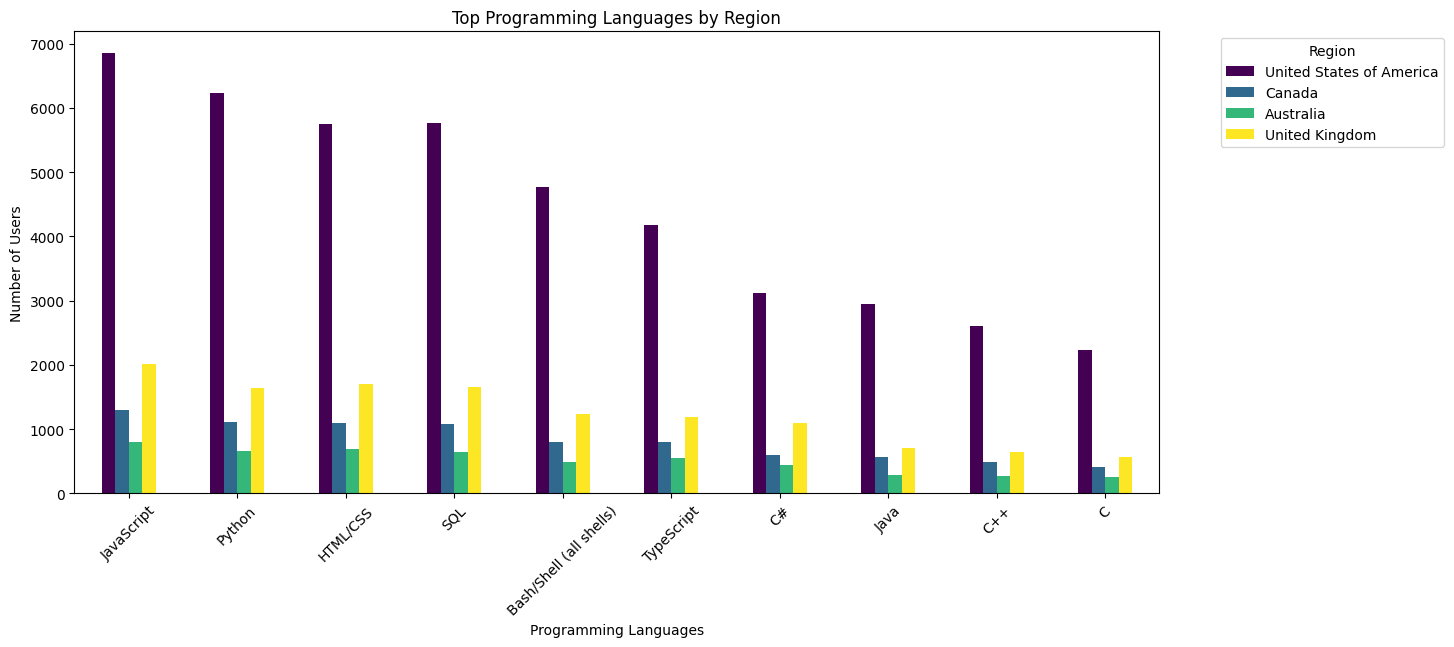

In [49]:
# Select the top 10 most used languages globally
top_languages = filtered_df.sum(axis=1).sort_values(ascending=False).head(10).index

# Filter only the top languages
filtered_top = filtered_df.loc[top_languages]

# Plot
filtered_top.plot(kind='bar', figsize=(14, 6), colormap='viridis')

plt.title("Top Programming Languages by Region")
plt.xlabel("Programming Languages")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Correlation Between Experience and Satisfaction

In [94]:
missing_jobsat1 = df['JobSatPoints_1'].isna().sum()
print('Missing values on JobSatPoints_1 col: ', missing_jobsat1,' (', round((100*missing_jobsat1)/new_df.shape[0],2), '% )')
#df['JobSatPoints_1'].describe()

Missing values on JobSatPoints_1 col:  36113  ( 55.19 % )


In [90]:
partial_df=pd.concat([new_df['YearsCodePro'],new_df['ExperienceLevel'], new_df['JobSatPoints_1']], axis=1)
#keep only rows where JobSatPoints_1 is available
filtered_df = partial_df.dropna(subset=['JobSatPoints_1'])

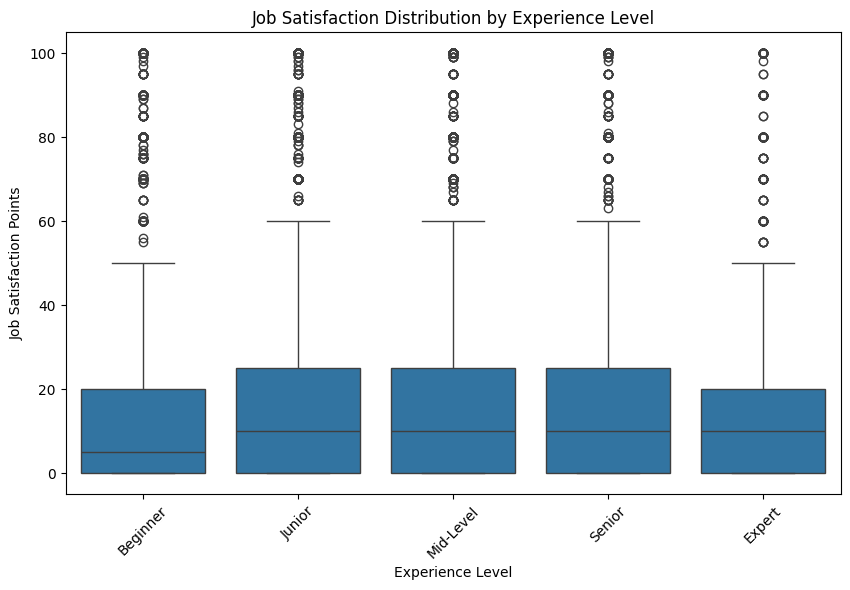

In [93]:
plt.figure(figsize=(10, 6))

experience_order = ['Beginner', 'Junior', 'Mid-Level', 'Senior', 'Expert']

sns.boxplot(data=filtered_df, x='ExperienceLevel', y='JobSatPoints_1',order=experience_order)

plt.title('Job Satisfaction Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Job Satisfaction Points')
plt.xticks(rotation=45)

plt.show()


## Educational Background and Employment Type

In [95]:
Employment_edlevel=pd.concat([Employment, new_df['EdLevel']], axis=1)

In [96]:
# Cross-tabulation of EdLevel by Employment Type
employment_types = [
    "Employed, full-time",
    "Employed, part-time",
    "I prefer not to say",
    "Independent contractor, freelancer, or self-employed",
    "Not employed, and not looking for work",
    "Not employed, but looking for work",
    "Retired",
    "Student, full-time",
    "Student, part-time"
]

# Creating a crosstab
#The table shows how many people in each education category are employed in different ways (e.g., full-time, part-time, self-employed).
edlevel_crosstab = pd.crosstab(index=Employment_edlevel['EdLevel'],
                                    columns=Employment_edlevel[employment_types].idxmax(axis=1))

# Display the result
edlevel_crosstab

col_0,"Employed, full-time","Employed, part-time",I prefer not to say,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,"Student, full-time","Student, part-time"
EdLevel,,,,,,,,,
"Associate degree (A.A., A.S., etc.)",1348,120,9,196,17,113,19,93,15
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20397,1256,129,2104,231,1356,165,1132,131
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",13221,708,78,1584,110,505,125,376,43
Primary/elementary school,253,77,54,115,146,94,7,430,50
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2445,142,30,298,21,83,98,60,5
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",2150,620,98,649,327,445,22,1763,147
Some college/university study without earning a degree,4862,648,63,1010,173,519,84,786,84
Something else,486,68,85,91,44,73,12,120,19


In [ ]:
#Normalize the Cross-tabulation (Percentage)
education_employment_pct = edlevel_crosstab.div(edlevel_crosstab.sum(axis=1), axis=0) * 100
education_employment_pct.head()

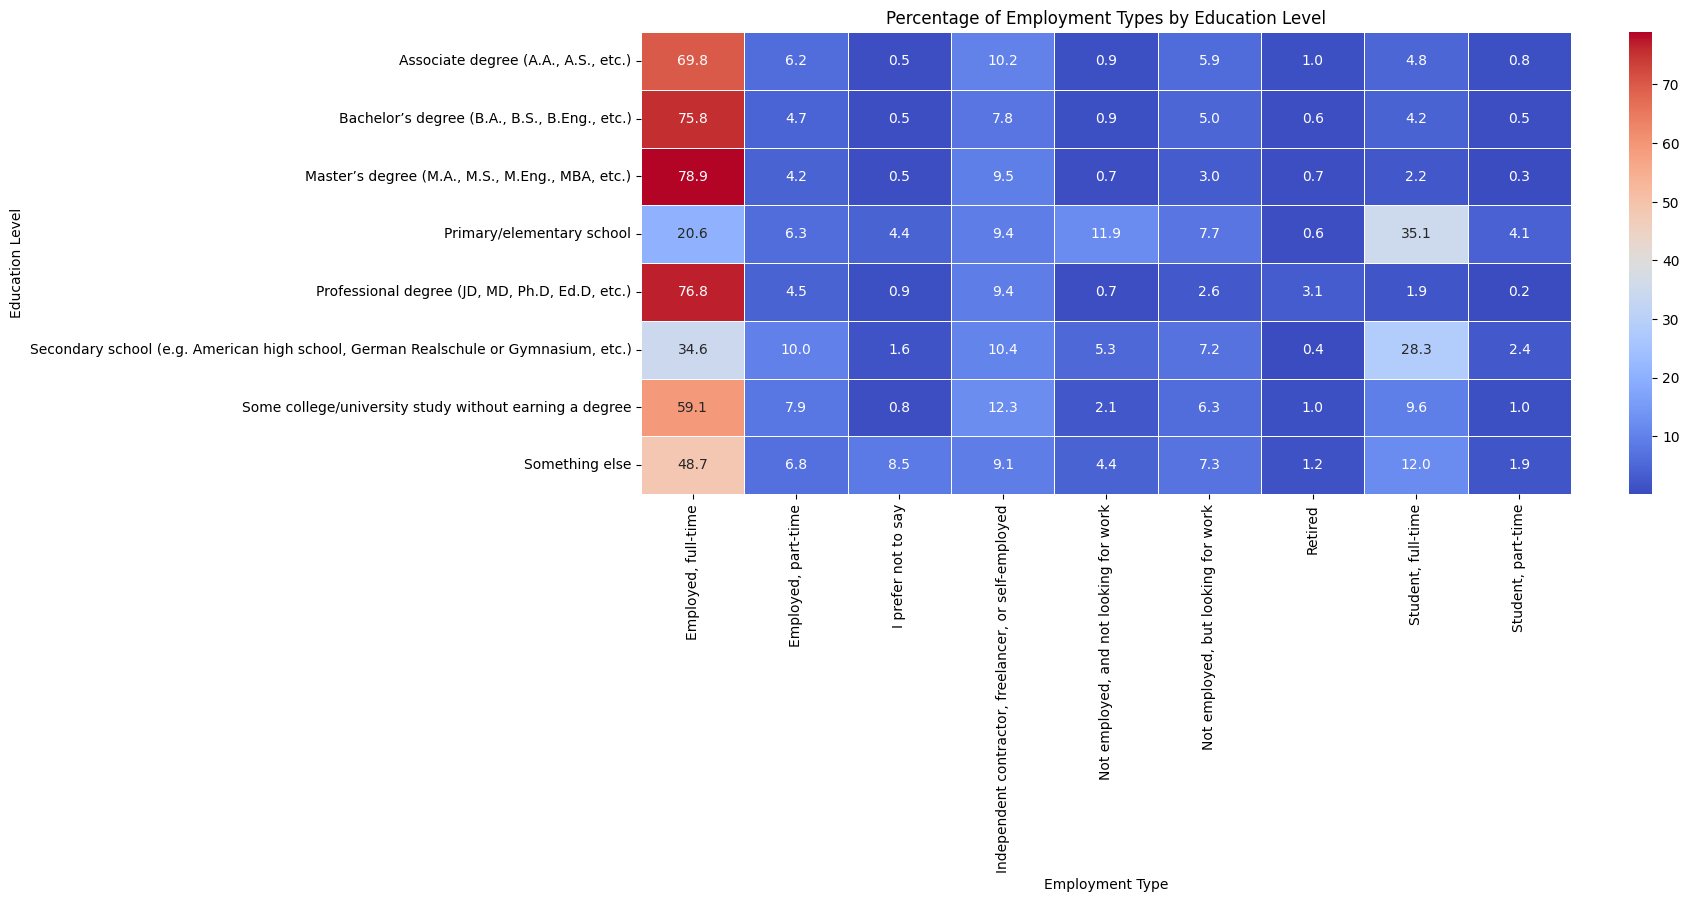

In [102]:
plt.figure(figsize=(15, 6))

sns.heatmap(education_employment_pct, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)

plt.title("Percentage of Employment Types by Education Level")
plt.xlabel("Employment Type")
plt.ylabel("Education Level")
#plt.xticks(rotation=45)

plt.show()

### Key Insights to Look For
Are people with higher education (Master’s, PhD) more likely to be full-time employees?

Do people with lower education (high school, associate degrees) engage more in freelancing or self-employment?

Are there noticeable differences in part-time employment across different education levels?

## Programming Languages Analysis

In [104]:
LanguageWantToWorkWith = new_df['LanguageWantToWorkWith'].str.get_dummies(sep=';')
LanguageWantToWorkWith.head()

,Ada,Apex,Assembly,Bash/Shell (all shells),C,C#,C++,Clojure,Cobol,Crystal,Dart,Delphi,Elixir,Erlang,F#,Fortran,GDScript,Go,Groovy,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,Lisp,Lua,MATLAB,MicroPython,Nim,OCaml,Objective-C,PHP,Perl,PowerShell,Prolog,Python,R,Ruby,Rust,SQL,Scala,Solidity,Swift,TypeScript,VBA,Visual Basic (.Net),Zephyr,Zig
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
# Sum across rows to get the total count per language
worked_counts = LanguageHaveWorkedWith.sum()
wanted_counts = LanguageWantToWorkWith.sum()

# Convert to DataFrame for easier visualization
lang_counts = pd.DataFrame({
    'Language': worked_counts.index,
    'WorkedWith': worked_counts.values,
    'WantToWorkWith': wanted_counts.values
})

# Sort by most used languages
lang_counts = lang_counts.sort_values(by="WorkedWith", ascending=False)

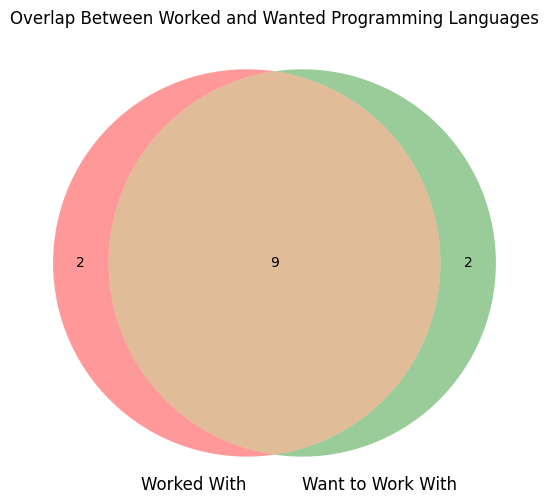

In [112]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Convert languages into sets
worked_set = set(lang_counts[lang_counts["WorkedWith"] > 10000]["Language"])
wanted_set = set(lang_counts[lang_counts["WantToWorkWith"] > 10000]["Language"])

# Create a Venn diagram
plt.figure(figsize=(8, 6))
venn2([worked_set, wanted_set], set_labels=("Worked With", "Want to Work With"))
plt.title("Overlap Between Worked and Wanted Programming Languages")
plt.show()

# Create dataframes for visualizations

In [167]:
language_future = new_df['LanguageHaveWorkedWith'].str.get_dummies(sep=';').sum().reset_index()
language_past = new_df['LanguageWantToWorkWith'].str.get_dummies(sep=';').sum().reset_index()

#rename columns
language_future.columns = ['Language', 'lg_future']
language_past.columns = ['Language', 'lg_past']

#merging
language=pd.merge(language_past,language_future, on='Language', how='outer')

In [168]:
db_future = new_df['DatabaseWantToWorkWith'].str.get_dummies(sep=';').sum(axis=0).reset_index()
db_past = new_df['DatabaseHaveWorkedWith'].str.get_dummies(sep=';').sum(axis=0).reset_index()

#rename columns
db_future.columns = ['Database', 'db_future']
db_past.columns = ['Database', 'db_past']

#merging
database=pd.merge(db_past,db_future, on='Database', how='outer')

In [169]:
pf_future = new_df['PlatformWantToWorkWith'].str.get_dummies(sep=';').sum(axis=0).reset_index()
pf_past = new_df['PlatformHaveWorkedWith'].str.get_dummies(sep=';').sum(axis=0).reset_index()

#rename columns
pf_future.columns = ['Platform', 'pf_future']
pf_past.columns = ['Platform', 'pf_past']

#merging
platform=pd.merge(pf_past,pf_future, on='Platform', how='outer')

In [171]:
wf_future = new_df['WebframeWantToWorkWith'].str.get_dummies(sep=';').sum(axis=0).reset_index()
wf_past = new_df['WebframeHaveWorkedWith'].str.get_dummies(sep=';').sum(axis=0).reset_index()

#rename columns
wf_future.columns = ['Webframe', 'wf_future']
wf_past.columns = ['Webframe', 'wf_past']

#merging
webframe=pd.merge(wf_past,wf_future, on='Webframe', how='outer')

In [177]:
# create a excel writer object
with pd.ExcelWriter("/content/drive/MyDrive/Colab Notebooks/Data/05_Survey_analysis.xlsx") as writer:
  new_df.to_excel(writer, sheet_name="Survey_analysis", index=False)
  language.to_excel(writer, sheet_name="Language", index=False)
  database.to_excel(writer, sheet_name="Database", index=False)
  platform.to_excel(writer, sheet_name="Platform", index=False)
  webframe.to_excel(writer, sheet_name="Webframe", index=False)